In [2]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
path = './robustness analysis/results/full/'

persistence = pd.read_csv(path + "all_persistence_data.csv")
morphometry = pd.read_csv(path + "all_morphometric_data.csv")
density_map = pd.read_csv(path + "all_density_data.csv")


In [4]:
df_all = persistence[persistence['shuffled'] == True].groupby(['truncated','pair']).mean()
df_all = df_all.append(morphometry[morphometry['shuffled'] == True].groupby(['truncated','pair']).mean())
df_all = df_all.append(density_map[density_map['shuffled'] == True].groupby(['truncated','pair']).mean())
df_all = df_all.reset_index()

Text(0.5, 0.98, 'Robustness analysis')

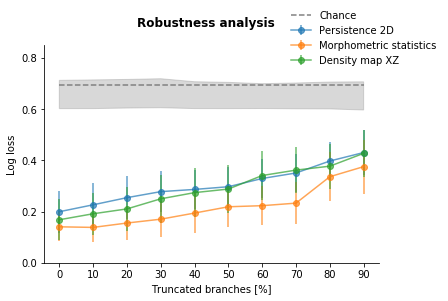

In [5]:
score = 'log_loss_test'
xticks = range(0,100,10)

# plot chance level, the grey shaded area
chance_min = df_all.groupby('truncated').quantile(.025)['log_loss_test'].values
chance_max = df_all.groupby('truncated').quantile(.975)['log_loss_test'].values
plt.fill(list(range(0,100,10))+list(range(0,100,10))[::-1],
         np.hstack((chance_min,chance_max)), 'grey', alpha=.3, edgecolor='grey')
plt.plot([0,90],[-np.log(.5),-np.log(.5)], 'grey',linestyle='--', label='Chance')

# plot feature performances
P = persistence[persistence['shuffled'] == False].groupby(['truncated', 'pair']).mean().reset_index()
del P['shuffled']
plt.errorbar(xticks, y = P.groupby('truncated')[score].mean()[0:90],
             yerr=1.96*P.groupby('truncated')[score].sem()[0:90], 
             marker='o',alpha=.7, label='Persistence 2D')

M = morphometry[morphometry['shuffled'] == False].groupby(['truncated', 'pair']).mean().reset_index()
del M['shuffled']
plt.errorbar(xticks, y = M.groupby('truncated')[score].mean()[0:90],
             yerr=1.96*M.groupby('truncated')[score].sem()[0:90], 
             marker='o',alpha=.7,label='Morphometric statistics')

DM = density_map[density_map['shuffled'] == False].groupby(['truncated', 'pair']).mean().reset_index()
del DM['shuffled']
plt.errorbar(xticks, y = DM.groupby('truncated')[score].mean()[0:90],
             yerr=1.96*DM.groupby('truncated')[score].sem()[0:90], 
             marker='o',alpha=.7,label='Density map XZ')

sns.despine()
plt.legend(frameon=False, bbox_to_anchor=(1.2,1.2))
plt.gca().set_xticks(xticks)
plt.gca().set_xticklabels(xticks)
plt.gca().set_yticks([0,0.2,.4,.6,.8])
plt.xlabel("Truncated branches [%]")
plt.ylim([0,.85])
if score == 'log_loss_test':
    plt.ylabel("Log loss")
elif score == 'accuracy_test':
    plt.ylabel("Accuracy")
plt.suptitle("Robustness analysis",weight='bold')
